## Метод Рунге-Кутта-Мерсона

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def Runge_Kutta(a, b, N, f, ya):
    nodes = np.linspace(a, b, N+1)
    h = (b-a)/(N)
    y = np.zeros((N+1, len(ya)))
    y[0] = ya
    for i in range(N):
        t = nodes[i]
        yn = y[i]
        k1 = f(t, yn)
        k2 = f(t + h/3, yn + h*k1/3)
        k3 = f(t + h/3, yn + h*k1/6 + h*k2/6)
        k4 = f(t + h/2, yn + h*k1/8 + 3*h*k3/8)
        k5 = f(t + h, yn + h*k1/2 - 3*h*k3/2 + 2*h*k4)
        y[i+1] = y[i] + h*(k1 + 4*k4 + k5)/6
    return y

def error(nodes, y_calc, y_precise):
    y_precise_mat = []
    for t in nodes:
        y_precise_mat.append([func(t) for func in y_precise])
    y_precise = np.array(y_precise_mat)

    errors = []

    for i in range(len(nodes)):
        errors.append(max(abs(y_calc[i] - y_precise[i])))

    return np.array(errors)

## Тестовая задача

In [139]:
def f(t, y):
    y1, y2 = y[0], y[1]
    return np.array([
        y1/(2+2*t) - 2*t*y2,
        2*t*y1 + y2/(2+2*t)
    ])

In [141]:
a, b, N = 0, 2, 100
h = (b-a)/(N)

y_precise = np.array([lambda t: np.cos(t*t)*np.sqrt(1+t), 
                      lambda t: np.sin(t*t)*np.sqrt(1+t)])
ya = np.array([y_precise[0](a), y_precise[1](a)])

y_calc = Runge_Kutta(a, b, N, f, ya)
nodes = np.linspace(a, b+1e-15, N+1)
print(error(nodes, y_calc, y_precise))

[0.00000000e+00 1.74498143e-11 3.44024425e-11 5.11369506e-11
 6.79263486e-11 8.50372845e-11 1.02729270e-10 1.21253455e-10
 1.40850848e-10 1.61750079e-10 1.84164524e-10 2.08288872e-10
 2.34295153e-10 2.62328007e-10 2.92499497e-10 3.24883009e-10
 3.59506896e-10 3.96346955e-10 4.35318864e-10 4.76269357e-10
 5.18967341e-10 5.63094238e-10 6.08233963e-10 6.53862242e-10
 6.99335978e-10 7.43881901e-10 7.86586241e-10 8.26383240e-10
 8.62043992e-10 8.92167784e-10 9.15171383e-10 9.29281263e-10
 1.05795550e-09 1.23677535e-09 1.43182066e-09 1.64313296e-09
 1.87052418e-09 2.11354267e-09 2.37143172e-09 2.64309175e-09
 2.92703639e-09 3.22135096e-09 3.52364449e-09 3.83100773e-09
 4.13996604e-09 4.44643689e-09 4.74568429e-09 5.03228170e-09
 5.30007405e-09 5.54214619e-09 5.75079606e-09 5.91751947e-09
 6.03299777e-09 6.80272239e-09 7.81425724e-09 8.89805896e-09
 1.00517903e-08 1.12717866e-08 1.25528923e-08 1.38883005e-08
 1.52693875e-08 1.66855527e-08 1.81240565e-08 1.95698726e-08
 2.10055473e-08 2.241107

In [167]:
Ns = np.arange(100, 2001, 100)
hs = []
max_errors = []
max_errors_h = []
for N in Ns:
    h = (b-a)/N
    hs.append(h)
    nodes = np.linspace(a, b+1e-15, N+1)
    y_calc = Runge_Kutta(a, b, N, f, ya)

    errors = error(nodes, y_calc, y_precise)
    max_errors.append(max(errors))
    max_errors_h.append(max(errors)/(h**5))

hs = np.array(hs)
max_errors = np.array(max_errors)
max_errors_h = np.array(max_errors_h)


Text(0.5, 1.0, 'Зависимость погрешности от $h$')

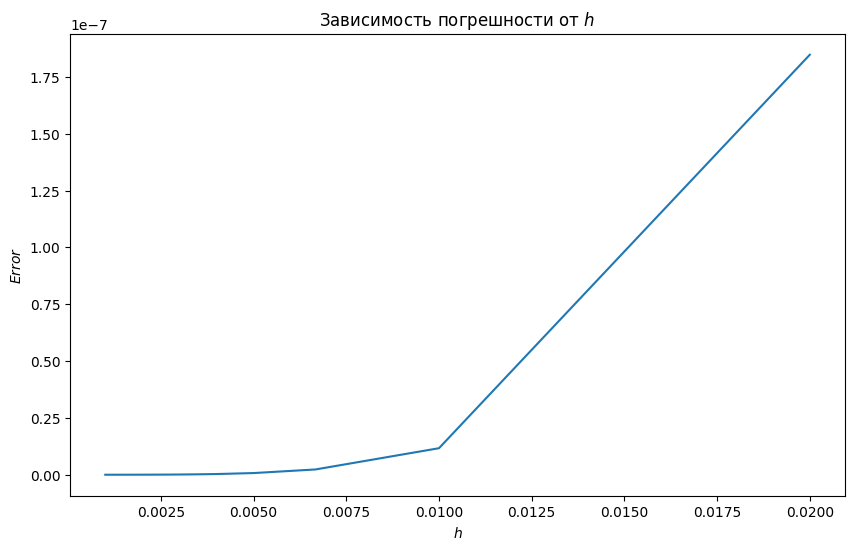

In [168]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(hs, max_errors)
plt.xlabel('$h$')
plt.ylabel('$Error$')
plt.title("Зависимость погрешности от $h$")

Text(0.5, 1.0, 'Зависимость погрешности от $h^5$')

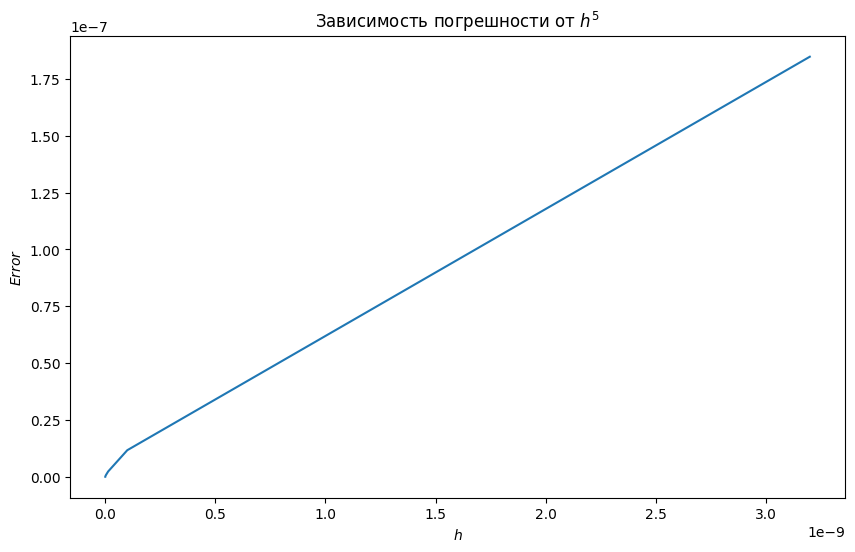

In [169]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(hs**5, max_errors)
plt.xlabel('$h$')
plt.ylabel('$Error$')
plt.title("Зависимость погрешности от $h^5$")

Text(0.5, 1.0, 'Зависимость отношения $Error/h^5$ от шага h')

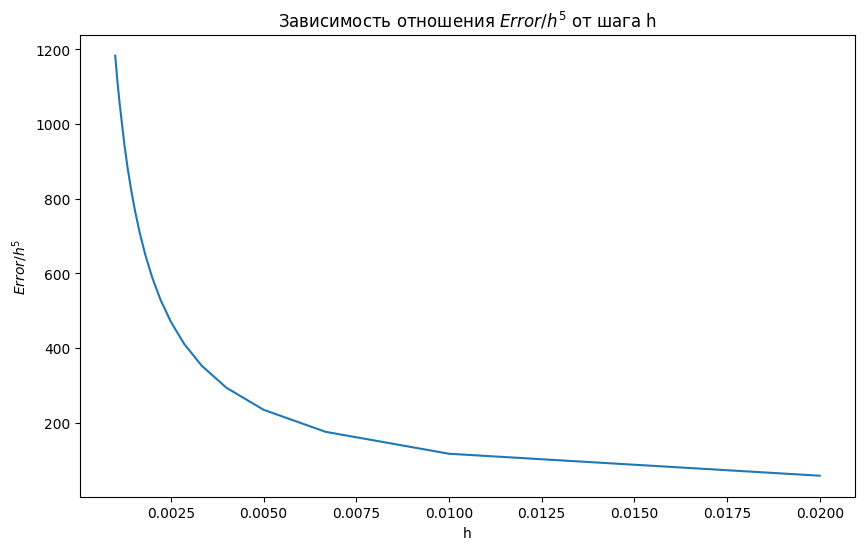

In [170]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(hs, max_errors_h)
plt.xlabel('h')
plt.ylabel('$Error/h^5$')
plt.title("Зависимость отношения $Error/h^5$ от шага h")

In [171]:
alphas = [np.log10(max_errors[i+1]/max_errors[i])/np.log10(hs[i+1]/hs[i]) for i in range(len(hs)-1)]
alphas

[3.9856030257471806,
 3.9916633182756485,
 3.9940782660287604,
 3.995439087565853,
 3.9960329092138798,
 3.9967694410212133,
 3.996532829106362,
 3.9983645119766207,
 3.9971861708960126,
 3.994256790782915,
 3.9995121086173717,
 3.997087694635714,
 3.9968030514137176,
 4.000475482991965,
 3.9824021510261858,
 3.9435008325922394,
 4.032621417687599,
 4.0014365923875665,
 3.954761098813921]

## Основная задача

In [172]:
def f(t, y):
    global lmbda, beta, c0, T0
    c = y[0]
    T = y[1]
    return np.array([
         -c*np.exp(-1/T) + lmbda*(c0-c),
         c*np.exp(-1/T) + beta*(T0-T)
    ])

In [173]:
a, b, N = 0, 15, 100
h = (b-a)/N

c0, T0, lmbda, beta = 120, 0.23, 0.45, 45

ya = np.array([c0, T0])

y_calc = Runge_Kutta(a, b, N, f, ya)
nodes = np.linspace(a, b+1e-15, N+1)
c = y_calc[:, 0]
T = y_calc[:, 1]

Text(0.5, 1.0, 'График решения в фазовом пространстве $(с, T)$')

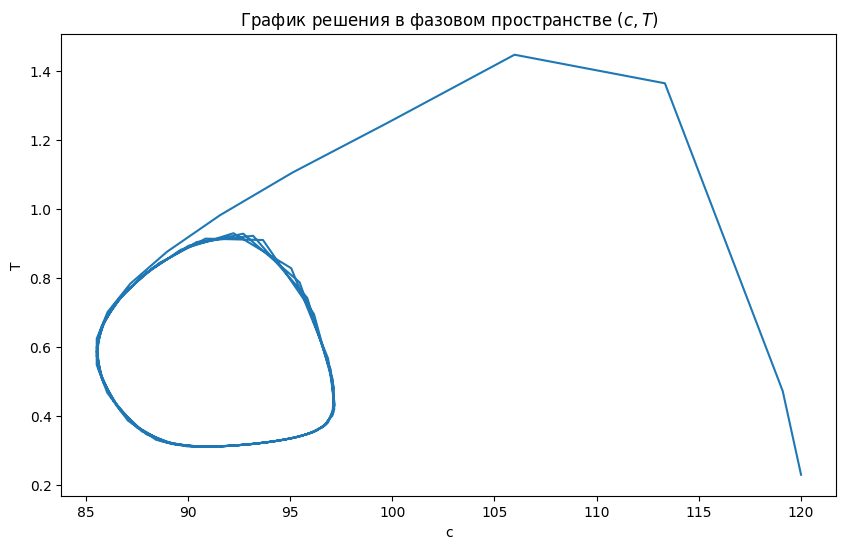

In [174]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(c, T)
plt.xlabel('c')
plt.ylabel('T')
plt.title("График решения в фазовом пространстве $(с, T)$")

Text(0, 0.5, '$T$')

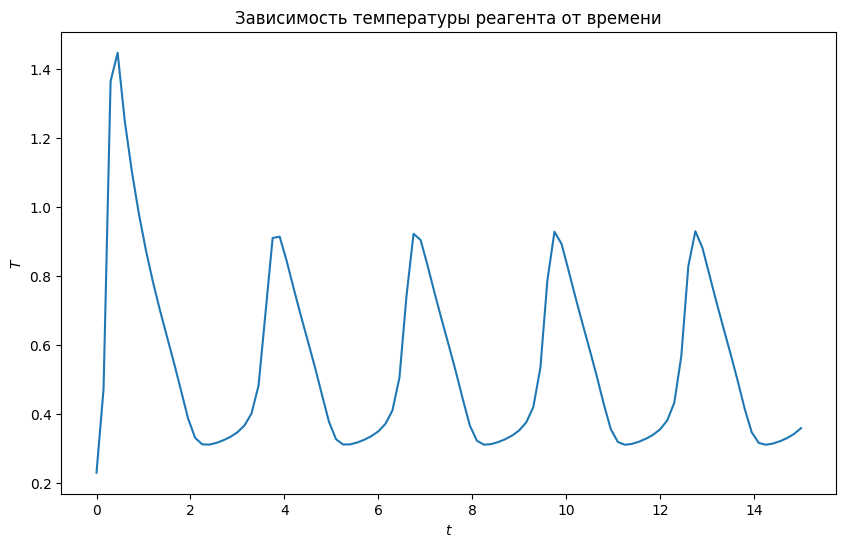

In [175]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(nodes, T)
plt.title("Зависимость температуры реагента от времени")
plt.xlabel('$t$')
plt.ylabel('$T$')

Text(0, 0.5, '$c$')

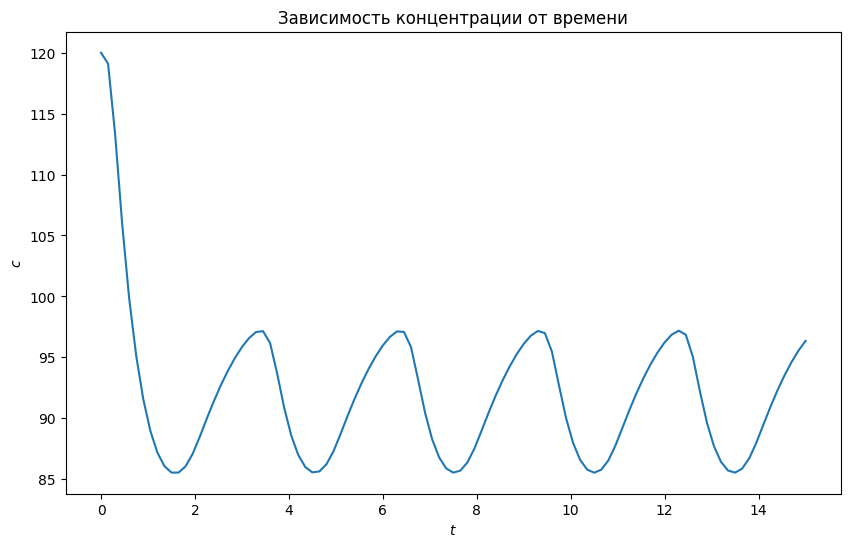

In [176]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(nodes, c)
plt.title("Зависимость концентрации от времени")
plt.xlabel('$t$')
plt.ylabel('$c$')

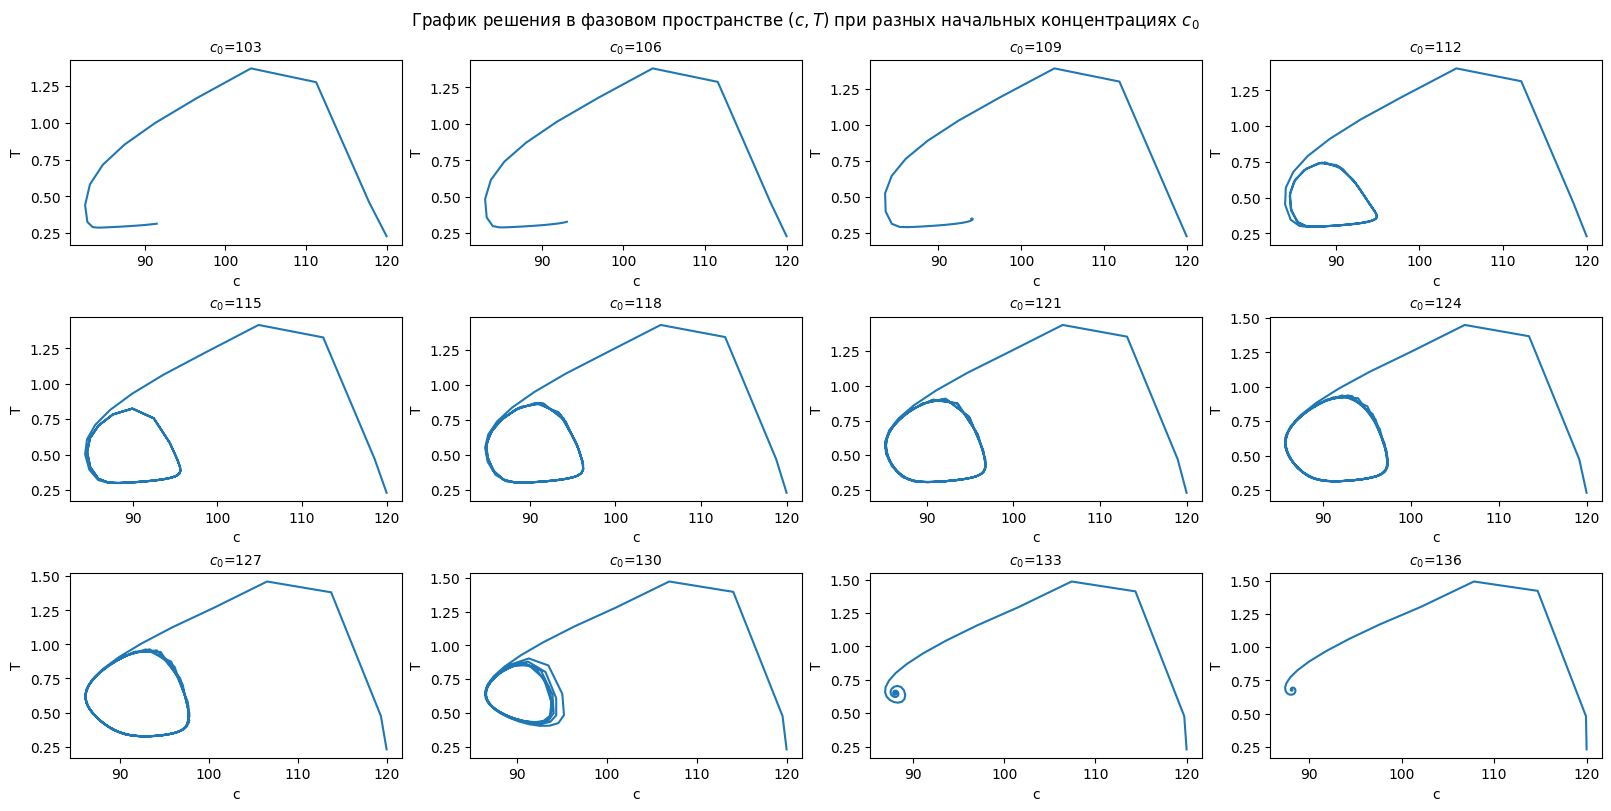

In [178]:
fig, ax = plt.subplots(3, 4, layout="constrained", figsize=(16, 8))
c0 = 100
fig.suptitle("График решения в фазовом пространстве $(c, T)$ при разных начальных концентрациях $c_0$")
for i in range(3):
    for j in range(4):
        y_calc = Runge_Kutta(a, b, N, f, ya)
        nodes = np.linspace(a, b+1e-15, N+1)
        c = y_calc[:, 0]
        T = y_calc[:, 1]
        c0 += 3
        ax[i][j].plot(c, T)
        ax[i][j].set_title(f"$c_0$={c0}", fontsize=10)
        ax[i][j].set_xlabel('c', fontsize=10)
        ax[i][j].set_ylabel('T', fontsize=10)
